In [0]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [0]:
def kmeanspp(data, k):
  centroids = []
  centroids.append(data[np.random.randint(data.shape[0])])

  for i in range(k-1):
    distances = []
    for p in data:
      dist = np.min(np.sqrt(np.sum([(p-centroid)**2 for centroid in centroids], axis=1)))
      distances.append(dist)
    distances = np.array(distances)
    probs = distances**2 / np.sum(distances**2)
    centroids.append(data[np.random.choice(np.arange(len(data)),p=probs)])
  return np.array(centroids)

def init_centroids(data, k, method='random'):
  if method == 'random':
    return data[np.random.randint(data.shape[0], size=k)]
  elif method == 'kmeans++':
    return kmeanspp(data, k)
  elif method == 'image':
    centroids = np.vstack(([0, 0, 0],
                           [0, 0, 255], 
                           [0, 255, 0],
                           [0, 255, 255],
                           [255, 0 , 0],
                           [255, 0, 255],
                           [255, 255, 0], 
                           [255, 255, 255],
                           kmeanspp(data, k-8)))
    print(centroids.shape)
    return centroids

def lloyd(data, k, eps=1, max_iter=10, init_method='random'):
  centroids = init_centroids(data, k, method=init_method)
  prev_centroids = np.zeros_like(centroids)
  labels = np.zeros(data.shape[0])
  prev_labels  = np.full_like(labels, -1)
  iter = 0
  while np.any(prev_labels != labels) and np.any(np.abs(centroids - prev_centroids) > eps) and iter < max_iter:
    prev_labels = np.copy(labels)
    prev_centroids = np.copy(centroids)
    for i, pixel in enumerate(data):
      norms = np.sqrt(np.sum([(pixel-centroid)**2 for centroid in centroids], axis=1))
      labels[i] = np.argmin(norms)

    for i, _ in enumerate(centroids):
      centroids[i] = np.mean(data[np.argwhere(labels == i)], axis=0)
    print(f"Iteration: {iter}")
    iter += 1
  
  return centroids, labels

In [0]:
def draw2d(img, labels, colors=('b', 'y', 'r', 'g')):
  for i, label in enumerate(set(labels)):
    plt.scatter(img[np.argwhere(labels == label)].reshape(-1, 2)[:, 0], img[np.argwhere(labels == label)].reshape(-1, 2)[:, 1], c=colors[i])
  plt.show()

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7


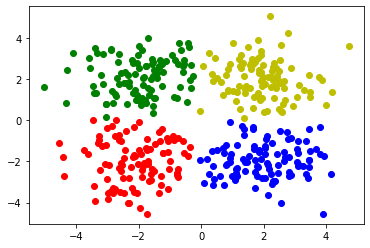

[[ 2.00728695 -1.95414735]
 [ 1.94076766  1.9963029 ]
 [-2.11487044 -2.02697214]
 [-1.97091457  2.10021496]]


In [4]:
sample_size = 100
cov = [[1,0], [0,1]]
norm1 = np.random.multivariate_normal(mean=[2, 2], cov=cov, size=sample_size)
norm2 = np.random.multivariate_normal(mean=[-2, 2], cov=cov, size=sample_size)
norm3 = np.random.multivariate_normal(mean=[2, -2], cov=cov, size=sample_size)
norm4 = np.random.multivariate_normal(mean=[-2, -2], cov=cov, size=sample_size)
rand_sample = np.concatenate([norm1, norm2, norm3, norm4])

centroids, labels = lloyd(rand_sample, k=4, eps=0.001, init_method='kmeans++')

draw2d(rand_sample, labels)
print(centroids)

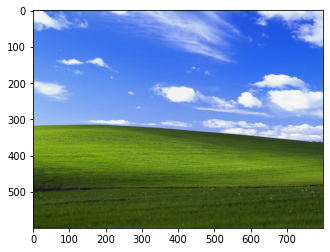

In [5]:
img = cv2.imread("field.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [6]:
K = 16
eps = 13
original_shape = img.shape
img = np.reshape(img, (-1, img.shape[2]))

centroids, labels = lloyd(img, k=K, eps=eps, init_method='image', max_iter=10)

(16, 3)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


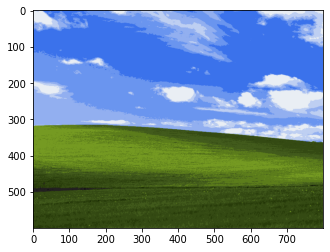

In [13]:
new_img = []
for label in labels.astype(int):
  new_img.append(centroids[label])
new_img = np.reshape(new_img, original_shape)
plt.imshow(new_img)
plt.show()

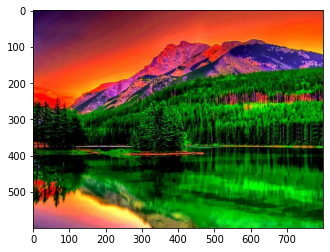

In [14]:
img = cv2.imread("mountain.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [15]:
K = 16
eps = 13
original_shape = img.shape
img = np.reshape(img, (-1, img.shape[2]))

centroids, labels = lloyd(img, k=K, eps=eps, init_method='image', max_iter=10)

(16, 3)
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


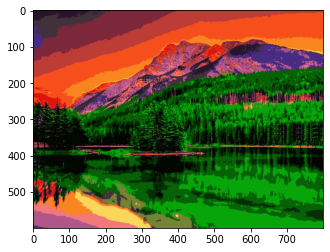

In [16]:
new_img = []
for label in labels.astype(int):
  new_img.append(centroids[label])
new_img = np.reshape(new_img, original_shape)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(new_img)
plt.show()